# Hypothesis Testing

This week, we will go through some examples on hypothesis testing by examining different data sets. In addition, we'll also have some interactive exercises. 

![](https://s3.amazonaws.com/libapps/accounts/73970/images/descriptive_and_inferential.JPG)

In [1]:
path_prefix = "Users\zirve\Masaüstü\SABANCI CS\CS210"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special

from os.path import join

import warnings 
warnings.simplefilter('ignore')

%matplotlib inline

### An Experiment on The Effect of Drugs

 A neurologist is testing the effect of a drug on response time by injecting 100 with a unit dose of drug, subjecting each to neurological stimulus and recording its response time. The neurologist knows that **the mean response time for rats not injected with te drug is 1.2 seconds**. **The mean of the 100 injected rats' response time is 1.05 seconds with a sample standard deviation of 0.5 seconds**. Do you think that the drug has an effect on the response time?

*Please open the notebook and follow the lead of your TA to answer this question.*

#### Populations and samples

- A **population** includes all of the elements from a set of data, i.e. contains all members of a specified group.
- A **sample** consists one or more observations drawn from the population.

![](https://online.stat.psu.edu/stat200/sites/stat200/files/inline-images/InferenceGraphicSU17.png)



#### Plotting a Probability Density Function

Firstly, let's plot how a **normal distribution** look like. In order to do that we need to determine the values for mean and std.

#### Population STD Deviation Estimation

Right now, we know to plot a the probability . We can do the same for our rats' reponse time population. But we do not know the population standard deviation. 

But, we can use the sample standard deviation to estimate the population std with the formula below.

$\Large{\sigma_{population} = \frac{\sigma_{sample}}{\sqrt{sample \; size}}}$

Now, let's first find the std of the population and then plot what the population look like.

#### Z-Score

Okay, so now we need a method to compare the drugged samples with the population and tell how significantly distant the means are from each other. 

We can use the **z-scores** and find how many standard deviations away the sample mean (drugged rats) is from the population mean. To calculate the z-scores, you can use the formula below.

$\Large{Z = \frac{\mu_{population} - \bar{x}_{sample}}{\sigma_{population}}}$

So now, let's first calculate the z-score and find out how many standard deviations away our sample mean is.

#### Locating The Sample

With the z-score at hand, we can further display how distant our sample mean is from the population mean. 

On top of the derived plot above, put a vertical line corresponding to **population_mean - (z-score*population_std)**, so that we can observe where the sample mean is located.

In matplotlib you can use `plt.axvline(location_on_x_axis, color="red")` function to put a vertical line on the plot. You may check this [link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axvline.html) to learn more about it.

![](https://mindcul.com/wp-content/uploads/2019/03/68-95-997.png)

At this point, we know what our z-score is. We also found out that the sample mean is _z-score_ standard deviation away from the population mean. **So what is the propability of getting a result this extreme?** We can utilize the z-table to obtain the target probability value. For instance, the figure above shows that the area which is one standard deviation away from the mean has a 0.68 probability. So we can compute the probability of the area we obtained with the z-score.

Based on the obtained results, what is your take on the first question? Do you think that the drug has an effect on the response time?

### Notes on Hypothesis Testing

> Hypothesis tests use data from a sample to make an inference about the value of a population parameter.


#### The Structure of a Hypothesis Test

1. Determine the hypotheses
  - **Null Hypothesis ($\large{H_0}$)**: Commonly accepted as the current fact, the hypothesis that sample observations result purely from chance.
  - **Alternative Hypothesis ($\large{H_A}$)**: The main purpose of the study, the hypothesis that you claim.

2. Collect and summarize the data into a **test statistic**.

  - Data and hypothesis determines the test type.
  - Once we have the two hypotheses, we’ll use the data to test which hypothesis we should believe.

3. Use the test statistic to determine the **p-value**.

4. The result is statistically significant if the p-value is less than or equal to the **level of significance ($\large{\alpha}$)**.

  - "Significance" is usually defined in terms of **a probability threshold $\alpha$** (generally set to 0.05).
  - We deem a particular result significant if the probability of obtaining that result under the null distribution is less than $\alpha$. This probability is known as the **p-value**.
  - p-values evaluate how well the sample data support that the null hypothesis is true.
  - The significance level, $\alpha$, is the probability of rejecting the null hypothesis when it is true.

If the obtained p-value is less than or equal to the significance value, the null hypothesis is rejected, otherwise we **fail to reject the null hypothesis.**

<img width="400" height="350" src="https://i.pinimg.com/originals/84/c6/7e/84c67e1a25bebdd3afad543c6bf79f89.jpg"></img>


#### A Small Example on Hypotheses

**Question**:  Do participants lose weight following a weight-loss intervention?

Data were collected from one group of participants before and after a weight-loss intervention. Data were paired by participant.  Assuming that **$x_1$ is an individual's weight before the intervention** and **$x_2$ is their weight at the end of the study**, **if they lost weight then $x_1 - x_2$ would be a positive number** (i.e., greater than 0). Thus, this is a right-tailed test. Because we are testing their mean difference, the parameter that we should write in our hypotheses is $\mu_d$ **where $\mu_d$ is the mean weight change** (before-after) in the population.

Our hypotheses are:

- $\large H_0: \mu_d = 0$
- $\large H_0: \mu_d > 0$
 

[source](https://online.stat.psu.edu/stat200/lesson/5/5.2/5.2.1)


#### Test Types

- In a **one-tailed hypothesis test**, we choose one direction for our alternative hypothesis: we either hypothesize that the test statistic is “significantly big”, or that the test statistic is “significantly small”.

- In a **two-tailed hypothesis test**, our alternative hypothesis encompasses both directions: we hypothesize that the test statistic is simply different from the predicted value.

![](https://stepupanalytics.com/wp-content/uploads/2017/06/Hypothesis-Testing-Edited1.jpg)



#### Error Types

When conducting a hypothesis test there are two possible decisions: reject the null hypothesis or fail to reject the null hypothesis. You should remember though, hypothesis testing uses data from a sample to make an inference about a population. When conducting a hypothesis test we do not know the population parameters. In most cases, we don't know if our inference is correct or incorrect.

[source](https://online.stat.psu.edu/stat200/)

||$H_0$ is true|$H_0$ is false|
|---|---|---|
|Reject $H_0$|**Type I Error**|Correct Decision|
|Fail to reject $H_0$|Correct Decision|**Type II Error**|

In terms of a courtroom scenario:

> Type I Error: Convicting an innocent defendant.

> Type II Error: Acquitting a criminal.

Lower $\alpha$ levels mean that smaller p-values are needed to reject the null hypothesis; this makes it more difficult to reject the null hypothesis, but this also reduces the probability of committing a Type I error.

### Visualizing Students' Performance

In "StudentsPerformance.csv", each row corresponds to a student with associated exam scores. In addition, we also have the ethnicity and the education level of their parents.

In [ ]:
filename = "StudentsPerformance.csv"

df = pd.read_csv(join(path_prefix, filename))

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Now, let's check if there is any significant difference between the students who completed the preparation course and those who did not.  
For this exercise, our focus is on reading scores.

In [ ]:
test_type = "reading score"

comp_studs = df[df["test preparation course"] == "completed"][test_type]  # completed students
none_studs = df[df["test preparation course"] == "none"][test_type]       # none students

In [ ]:
print(f"mean score of students who completed the course: {comp_studs.mean():.2f}")

mean score of students who completed the course: 73.89


In [ ]:
print(f"mean score of students who did not complete the course: {none_studs.mean():.2f}")

mean score of students who did not complete the course: 66.53


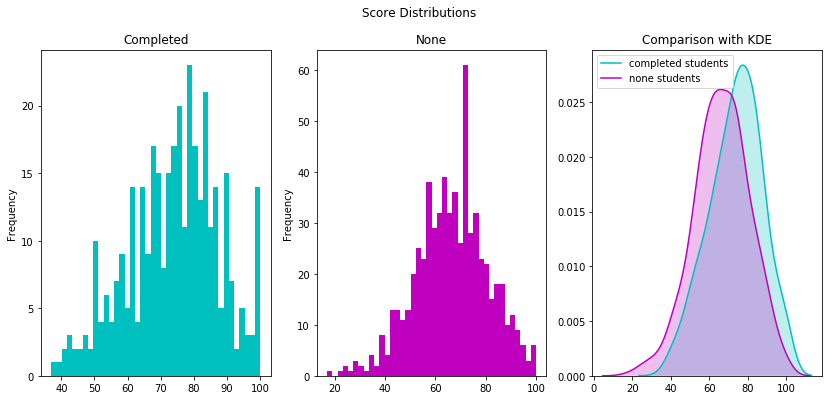

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
comp_studs.plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c")
ax[0].set_title("Completed")

none_studs.plot(kind="hist", ax=ax[1], bins=40, label="none", color="m")
ax[1].set_title("None")

sns.kdeplot(comp_studs, shade=True, label="completed students", ax=ax[2], color="c")
sns.kdeplot(none_studs, shade=True, label="none students", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Score Distributions")
plt.show()

From the figure above, we can see that the students who took the course obtained better results on average compared to the one who did not.  
Now, let's show this difference statistically by applying a significance test.

### T-Test

It is used to determine if there is a significant difference between the means of two groups. 

- **One-Sample T-test**
 - The One-Sample T-test determines whether the sample mean is statistically different from a known or hypothesised population mean.
- **Two-Sample T-test**
 - Determines whether the average difference between two groups is really significant or if it is due to random chance.


Scipy performs *two-sided tests* by default.

In [ ]:
rand_dist = np.random.normal(loc=10, scale=3, size=100)  # a normal dist with mean 10 and std 3

In [ ]:
# let's apply one-sample t-test
stats.ttest_1samp(rand_dist, 10)

Ttest_1sampResult(statistic=0.6654880529618713, pvalue=0.5072859082847307)

In [ ]:
# test score (statistic) sign gives the test type, i.e. the direction
# here, we have a negative test score which tells us that
# the data we have has a mean less than 11
stats.ttest_1samp(rand_dist, 11)

Ttest_1sampResult(statistic=-2.8418938060903614, pvalue=0.005446256623808158)

In [ ]:
# in this case, we have a positive test score
# which means we have a mean greater than 9
stats.ttest_1samp(rand_dist, 9)

Ttest_1sampResult(statistic=4.172869912014104, pvalue=6.46757608616037e-05)

Now, let's get back to the students data set. We can apply two-sample t-test to samples drawn from students data set.

In [ ]:
stats.ttest_ind(comp_studs, none_studs, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=8.004132353965, pvalue=4.388808024290594e-15)

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, the test score is positive which indicates that the mean score for students who completed the course is higher than those who did not.

### Anova (Analysis of Variance)

With t-test, we are able to compare two different samples. If we want to handle more samples, then we need utilize anova.

Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other.

***ANOVA will tell you that at least two groups were different from each other. But it won’t tell you what groups were different.***

In [ ]:
# extracting three different samples based on parent education level
bachelor = df[df["parental level of education"] == "bachelor's degree"]["reading score"]
masters = df[df["parental level of education"] == "master's degree"]["reading score"]
high_school = df[df["parental level of education"] == "high school"]["reading score"]

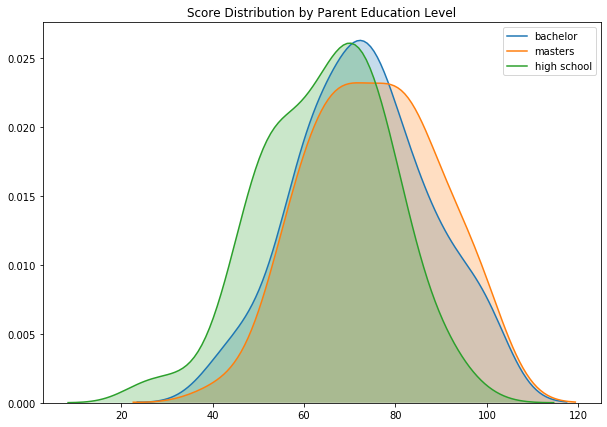

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(bachelor, shade=True, ax=ax, label="bachelor")
sns.kdeplot(masters, shade=True, ax=ax, label="masters")
sns.kdeplot(high_school, shade=True, ax=ax, label="high school")

plt.title("Score Distribution by Parent Education Level")
plt.show()

In [ ]:
stats.f_oneway(bachelor, masters, high_school)

F_onewayResult(statistic=19.799561618152772, pvalue=6.774863645904576e-09)

### Chi Square Test

The Chi-Squared test is is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance.

In [ ]:
filename = "happiness.csv"

df_c = pd.read_csv(join(path_prefix, filename))

In [ ]:
df_c.head()

,gender,status
0,male,happy
1,female,very happy
2,female,neutral
3,male,unhappy
4,male,very unhappy


We need to provide a contingency table to the chi square test. Let's create one from the data. The result should look something like this.

status,happy,neutral,unhappy,very happy,very unhappy
gender,,,,,
female,7,14,10,12,6
male,11,8,11,10,11


In [ ]:
# your code

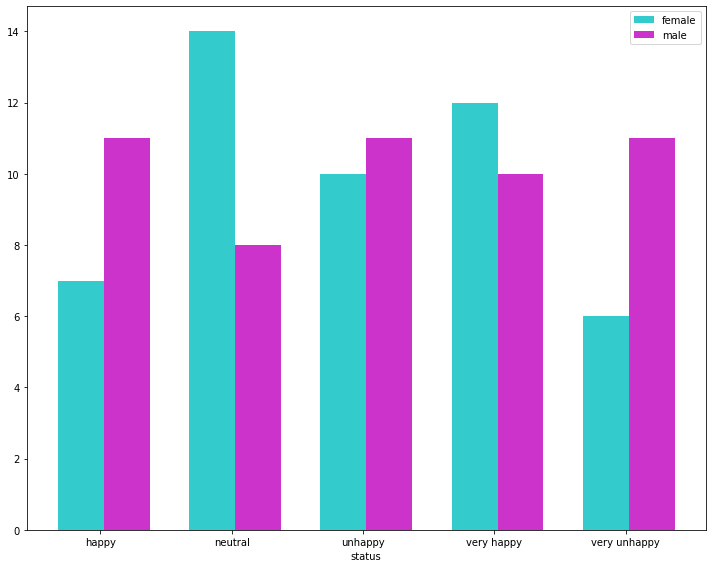

In [ ]:
female = gender.loc["female"]
male = gender.loc["male"]

fig, ax = plt.subplots(1, 1, figsize=(10,8))

index = np.arange(gender.columns.shape[0])
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, gender.loc["female"], bar_width,
    alpha=opacity,
    color='c',
    label='female')
 
rects2 = plt.bar(index + bar_width, gender.loc["male"], bar_width,
    alpha=opacity,
    color='m',
    label='male')
 
plt.xlabel('status')
plt.xticks(index + bar_width - 0.2, gender.columns)
plt.legend()
 
plt.tight_layout()
plt.show()

In [ ]:
stats.chi2_contingency(gender)

(4.186952771092311,
 0.38129539734045687,
 4,
 array([[ 8.82, 10.78, 10.29, 10.78,  8.33],
        [ 9.18, 11.22, 10.71, 11.22,  8.67]]))

### Pearson Correlation

A statistical test for checking correlation between two samples and whether they have a linear relationship. At the end, we have a correlation coefficient between -1 (negative association) and 1 (positive association). 

In [ ]:
filename = "heart.csv"

df_h = pd.read_csv(join(path_prefix, filename))

In [ ]:
df_h.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's check if age and cholestrol are correlated.

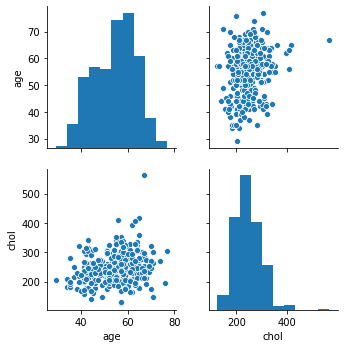

In [ ]:
cols = ["age", "chol"]

sns.pairplot(data=df_h, vars=cols)

In [ ]:
stats.pearsonr(df_h["age"], df_h["chol"])

(0.2136779565595619, 0.00017862864341450013)

As the correlation coefficient, we obtained 0.21 which states that the correlation between age and cholestrol is not signficant. From the p-value, less than the significance level, we can see that our test is significant.

### Random Permutation Tests

“Classic” statistical tests usually make some sort of assumption about the distribution of the data e.g. normally distribution data . Are these assumptions always true? Probably not, but they are often approximately close enough to give you a useful result. By making these assumptions, these tests are called parametric.

Random Permutation Tests make no assumptions on the underlying distribution of the data. They are considered non-parametric tests. This can be extremely useful when:

- Your data just doesn’t seem to fit the distribution the classic statistical test assumes. For instance, perhaps it is bi-modal and the test assumes normality.  
- You have outliers e.g. users who spend significantly more than others.
- You have a small sample size.

Now, let's apply a permutation test to the famous iris dataset. In this dataset, we have three different plant species, namely _setosa, versicolor_ and _virginica_.

We are going to utilize random permutations to assess the significance of the correlation within a species using the permutation test.

In [ ]:
# a method to download the dataset
df = sns.load_dataset('iris')

In [ ]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's have a look at the correlation between *petal_length* and *petal width* visually. Create a figure in which a scatter plot is displayed where x-axis represents *petal_length* and y-axis *petal_width*. Color each marker based on the *species*.

In [ ]:
# your code

Below, you may find the random permutation test pipeline, given a particular _species_. 

---

1. Compute the correlation coefficient between *petal_width* and *petal_length* of the given _species_ and assign the result to a variable named *base_score*.
2. Randomly shuffle *petal_width* values while keeping the *petal_length* values unchanged.
3. Compute the correlation coefficient for the new groups and store it.
4. Repeat 2 and 3 many times, let's say 1000.
5. Look at where the base correlation coefficient, *base_score*, falls in the distribution of random coefficients.

---

Under these circumstances, what is your answer to the question, the correlation between *petal width* and *petal length* differs across species?